# EDA Case Study_Saurabh_Mudgal_+_Shashi_Ranjan #

### 1. Data Sourcing ###

### a. Importing and Reading the Data ###

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#application_data.csv contains all the information of the client at the time of application.
#The data is about whether a client has payment difficulties.

app_data = pd.read_csv("application_data.csv")
prev_app_data = pd.read_csv("previous_application.csv")
col_description = pd.read_csv("columns_description.csv",encoding='unicode_escape')

### b. Data Inspection ### 

In [4]:
#Shape(rows , columns) of the app_data

app_data.shape

(307511, 122)

In [5]:
#Shape(rows , columns) of the prev_app_data

prev_app_data.shape

(1670214, 37)

In [6]:
#Shape(rows , columns) of the col_description

col_description.shape

(160, 5)

In [7]:
# To increase the row and columns count in display 

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [8]:
#data view of app_data

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
#data view of prev_app_data

prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#data view of col_description

col_description.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [11]:
#info of application_data.csv data

app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [12]:
#descibe data of application_data.csv

app_data.describe(include = np.number)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 2. Data Cleaning  and Manipulation ###

In [13]:
#Checking null values 
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [14]:
#number of columns with null values greater than 45%

null_more_than_45 = (app_data.isnull().sum()*100)/len(app_data)
len(null_more_than_45[null_more_than_45 >.45])

57

In [15]:
#list of the columns having null values greater than 45%

rem = list(null_more_than_45[null_more_than_45 >.45].index)
rem

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE

In [16]:
#number of columns with null values less than or equal to 45%


null_less_than_45 = (app_data.isnull().sum()*100)/len(app_data)
len(null_less_than_45[null_less_than_45 <=.45])

65

In [17]:
#Obtaining columns with null values <= 45%

col_null_percentage = (app_data.isnull().sum()*100)/len(app_data)
col_null_percentage[col_null_percentage <=.45]

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


as per the result above , it is clearly visible that column 'AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2' have very less null values. so this much values can be imputed .

In [18]:
#descriptions of column 'AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2' 

col_description[col_description['Row'].isin(['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2',
                                             'DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS',
                                            'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])]


,Unnamed: 0,Table,Row,Description,Special
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN
10,13,application_data,AMT_GOODS_PRICE,For consumer loans it is the price of the good...,NaN
29,32,application_data,CNT_FAM_MEMBERS,How many family members does client have,NaN
42,45,application_data,EXT_SOURCE_2,Normalized score from external data source,normalized
91,94,application_data,OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
92,95,application_data,DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
93,96,application_data,OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
94,97,application_data,DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surrou...,NaN
95,98,application_data,DAYS_LAST_PHONE_CHANGE,How many days before application did client ch...,NaN
125,179,previous_application.csv,AMT_ANNUITY,Annuity of previous application,NaN


as per the above description of columns  'EXT_SOURCE_2' and 'AMT_GOODS_PRICE' can be ignore or dropped because these columns shows very less impacts on the data.
whereas AMT_ANNUITY can be imputed since it has very less number of records to be imputed and can be imputed using median value.

In [19]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [20]:
#filling missing values of column 'AMT_ANNUITY' with median value. so that null values will have the most common value 

impute_val = app_data['AMT_ANNUITY'].median()

app_data.loc[app_data['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = impute_val

In [21]:
#CNT_FAM_MEMBERS

app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [22]:
#filling missing values of column 'CNT_FAM_MEMBERS' with median value.

impute_val = app_data['CNT_FAM_MEMBERS'].median()

app_data.loc[app_data['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS'] = impute_val

In [23]:
#DAYS_LAST_PHONE_CHANGE

app_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [24]:
#filling missing values of column 'DAYS_LAST_PHONE_CHANGE' with mean value, since mean will tell us the average cycle of changing the phone

impute_val = app_data['DAYS_LAST_PHONE_CHANGE'].mean()

app_data.loc[app_data['DAYS_LAST_PHONE_CHANGE'].isnull(),'DAYS_LAST_PHONE_CHANGE'] = impute_val

In [25]:
#Remove columns having more than 45% null values from the dataframe 

app_data = app_data.drop(columns= rem)


In [26]:
# remove columns 'EXT_SOURCE_2','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE',
#'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
#Since these columns have more than 30% null values

app_data.drop(['EXT_SOURCE_2','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], axis=1 , inplace=True)

In [27]:
#dataframe shape after removing the null data columns

app_data.shape

(307511, 59)

In [28]:
#look at the dataframe
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
#check on null values after dropping the columns

app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT        

In [30]:
#let's check on the rows null value percentage if they have greater or equal to 30%

rows_null = app_data.isnull().sum(axis=1)
rows_null = list(rows_null[rows_null.values>=.3*len(app_data)].index)
app_data.drop(labels = rows_null, axis=0 , inplace =True)

app_data.shape

(307511, 59)

### Some of the columns have negligible null values but we are certain that removing these columns also will not impact anything on the data ##

In [31]:
#Let's remove those columns which don't have anthing important to show 

remove_col_list = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6'
                   ,'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11'
                   ,'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16'
                   ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'
                   ,'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'
                   ,'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS'
                   ,'DAYS_LAST_PHONE_CHANGE']

app_data.drop(labels=remove_col_list, axis=1 , inplace=True)

In [32]:
app_data.shape

(307511, 29)

Though we have handled all the null values columns and rows but there could be some rows and columns where they could have different category  values 

In [33]:
app_data.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION               15688
DAYS_ID_PUBLISH                  6168
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT

In [34]:
#check for 'CODE_GENDER' since it shows 3 unique values

app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As we can see that female are applying more for loans as compare to males, so XNA can be replaced with F

In [35]:
#Replace XNA in app_data['CODE_GENDER']

app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']= 'F'
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [36]:
#let's check  percentages of each unique value for 'ORGANIZATION_TYPE'

app_data['ORGANIZATION_TYPE'].value_counts()*100/len(app_data)

Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant                 0

Since 'ORGANIZATION_TYPE' has a crucial role and also, it has XNA as 2nd highest value in the column.
It'd be good to drop these values.

In [37]:
app_data = app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)

app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape                

(0, 29)

In [38]:
#change variables into numeric Data Type

num_columns = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE'
               ,'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START'
               ,'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY'
               ,'LIVE_CITY_NOT_WORK_CITY']

app_data[num_columns] = app_data[num_columns].apply(pd.to_numeric)

In [39]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,252137.000000,252137.000000,252137.000000,2.521370e+05,2.521370e+05,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000,252137.000000
mean,278114.643103,0.086600,0.498515,1.759141e+05,6.113985e+05,27812.186704,0.020894,-14769.133174,-2384.169325,-4635.430849,-2800.639724,12.203302,0.017241,0.061919,0.049588,0.089769,0.281065,0.218988
std,102815.635309,0.281248,0.763161,2.588516e+05,4.065272e+05,14647.424282,0.013874,3662.573769,2338.360162,3252.169156,1515.360629,3.299799,0.130167,0.241008,0.217093,0.285851,0.449520,0.413561
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,0.000290,-25200.000000,-17912.000000,-22928.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189035.000000,0.000000,0.000000,1.125000e+05,2.779695e+05,17073.000000,0.010006,-17563.000000,-3175.000000,-6952.000000,-4177.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278064.000000,0.000000,0.000000,1.575000e+05,5.212800e+05,25834.500000,0.018850,-14573.000000,-1648.000000,-4265.000000,-2886.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,367165.000000,0.000000,1.000000,2.115000e+05,8.292240e+05,35617.500000,0.028663,-11775.000000,-767.000000,-1845.000000,-1487.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,0.072508,-7489.000000,0.000000,0.000000,0.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
#Convert Negative Integer Values to positive

app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()

app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].abs()

app_data['DAYS_REGISTRATION'] = app_data['DAYS_REGISTRATION'].abs()

app_data['DAYS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH'].abs()

In [41]:
#Round off the values from 6 to 4 for REGION_POPULATION_RELATIVE

app_data['REGION_POPULATION_RELATIVE'] = app_data['REGION_POPULATION_RELATIVE'].round(4)

In [42]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion


### 3. Data Analysis ###

AMT_INCOME_TOTAL and AMT_CREDIT are the colums which has impact on loan payment.

In [43]:
#AMT_INCOME_TOTAL analysis

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,
        225000,250000,275000,300000,325000,350000,375000,400000,
        425000,450000,475000,500000,10000000000]
slot = ['0-25000','25000-50000','50000-75000','75000,100000',
        '100000-125000','125000-150000','150000-175000','175000-200000',
        '200000-225000','225000-250000','250000-275000','275000-300000',
        '300000-325000','325000-350000','350000-375000','375000-400000',
        '400000-425000','425000-450000','450000-475000','475000-500000',
        '500000 and above']

app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [44]:
#AMT_CREDIT analysis

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,
        550000,600000,650000,700000,750000,800000,850000,900000,
        100000000]

slot = ['0-150000','150000-200000','200000-250000','250000-300000',
         '300000-350000','350000-400000','400000-450000','450000-500000',
         '500000-550000','550000-600000','600000-650000','650000-700000',
         '700000-750000','750000-800000','800000-850000','850000-900000',
         '900000 and above']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'], bins=bins,labels= slot)

In [45]:
#let's now create two subdatasets to get insights of customers who will face difficulties in repay and other than them
#Target variable (1 - client with payment difficulties and 0 - others)

target0_data = app_data.loc[app_data['TARGET']==0]
target1_data = app_data.loc[app_data['TARGET']==1]

In [46]:
#determine Imbalance

#target0 has the maximum values and target1 has lesser

round(len(target0_data)/len(target1_data),2)

10.55

The Imbalance is 10.55

### Univariate analysis for Different Categories ###

#### Analysis on clients with no payment difficulties ####

In [47]:
#count plot in log scale

def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 25
    plt.rcParams['axes.labelsize'] = 20
    
    temp = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width ,7)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.histplot(data=df , x=col ,hue=hue, palette='magma')
    plt.show()
    


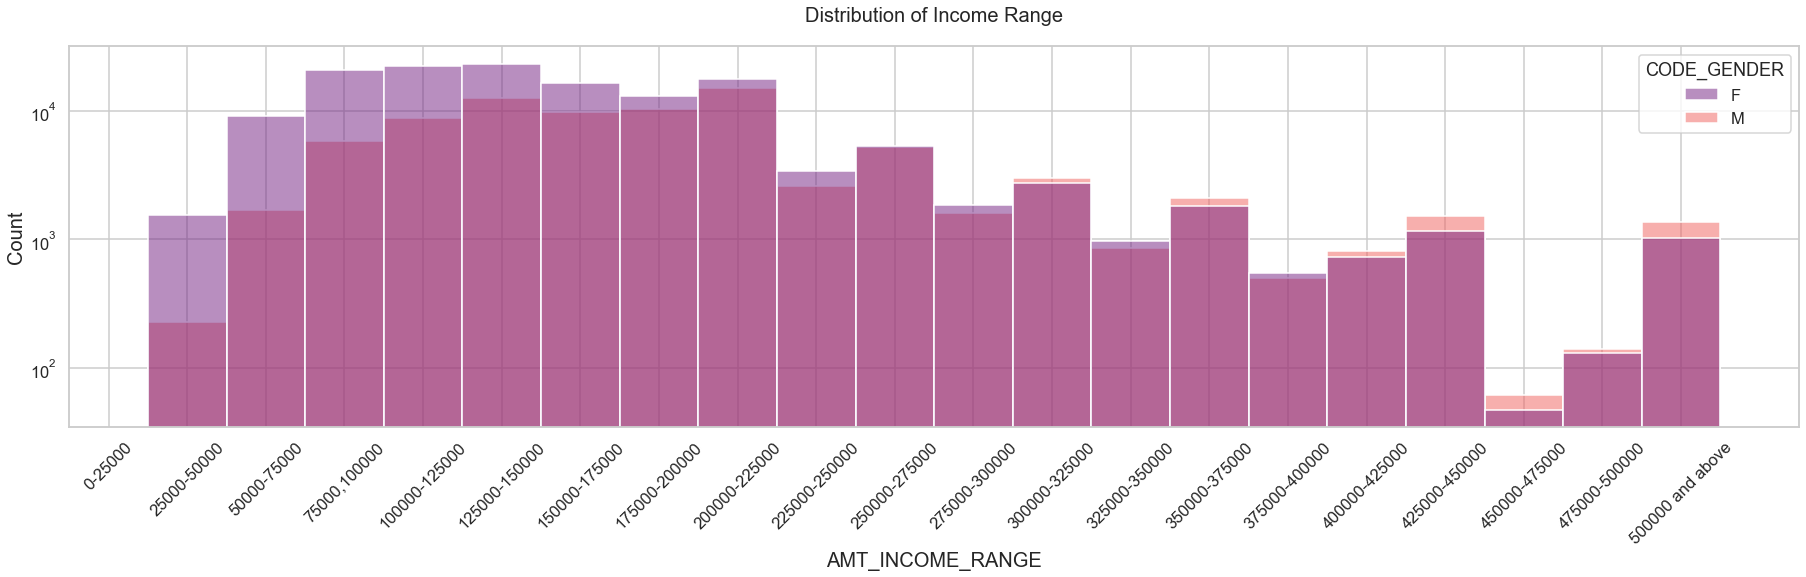

In [48]:
#create plot for AMT_INCOME_RANGE

uniplot(target0_data, col = 'AMT_INCOME_RANGE', title='Distribution of Income Range', hue='CODE_GENDER')

Conclusion from above plot:

1. Female counts higher than male.
2. Income range from 100000 to 225000 is having more number of credits.
3. Plot clearly shows that females are having more credits than males for the same ranges.
4. On and above 400000 credit count is very less.
5. For income range 25000-50000 females have way more credits than male.

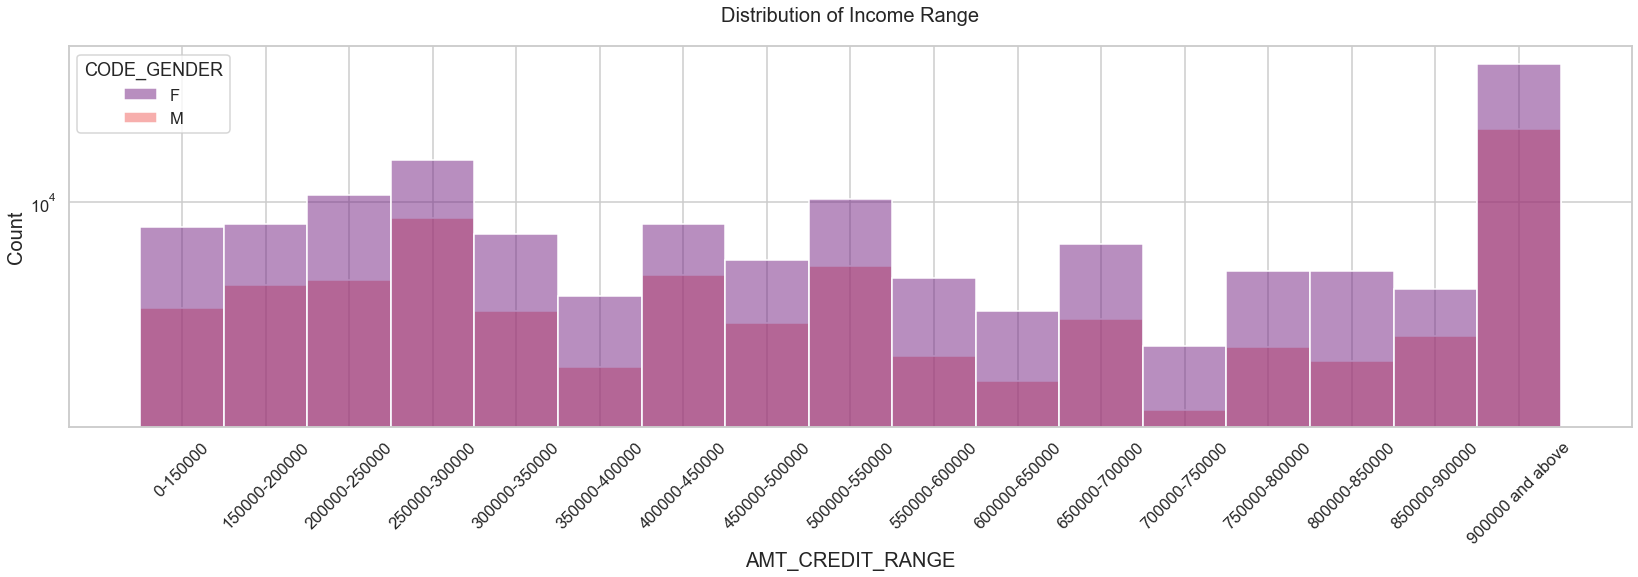

In [49]:
#create plot for AMT_INCOME_RANGE

uniplot(target0_data, col = 'AMT_CREDIT_RANGE', title='Distribution of Income Range', hue='CODE_GENDER')

Conclusion from above plot:

1. Females have more credit than males for each credit range.
2. for range 700000-750000 credit count is very less.

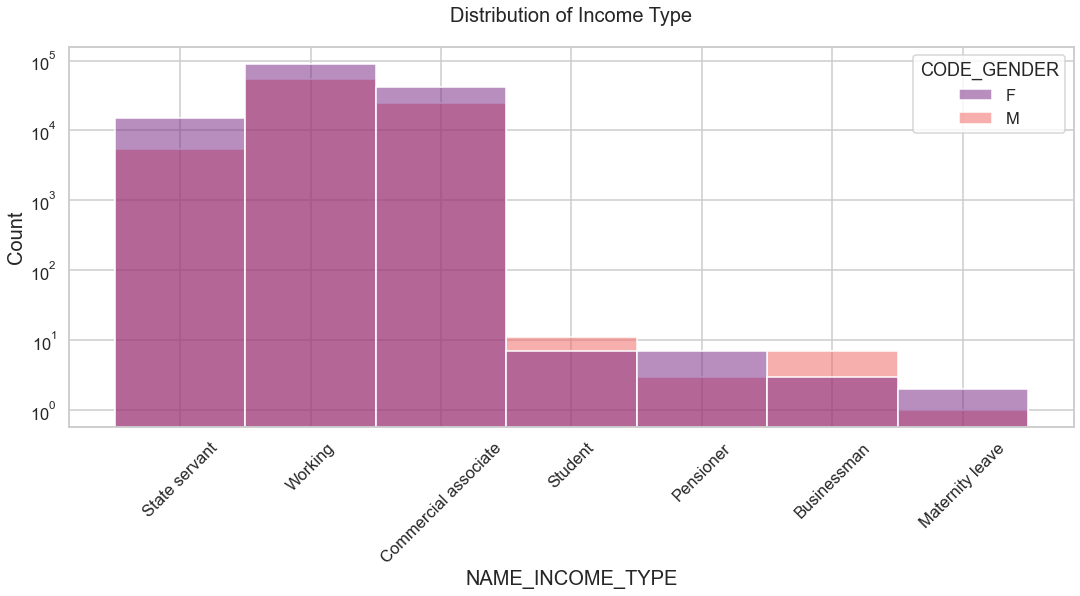

In [50]:
#create plot for NAME_INCOME_TYPE

uniplot(target0_data, col = 'NAME_INCOME_TYPE', title='Distribution of Income Type', hue='CODE_GENDER')

Conclusion from above plot:

1. There are cearly there types which are on top in the category or have the higher credit count as comapre to other categories.
2. Here also, Females are having more credits in these top three income types.
3. Student income type is having more credit than Businessman , pensioner and Maternity leaves.
4. There are only two categories where male have more income than female i.e. 'Student', 'Businessman'.

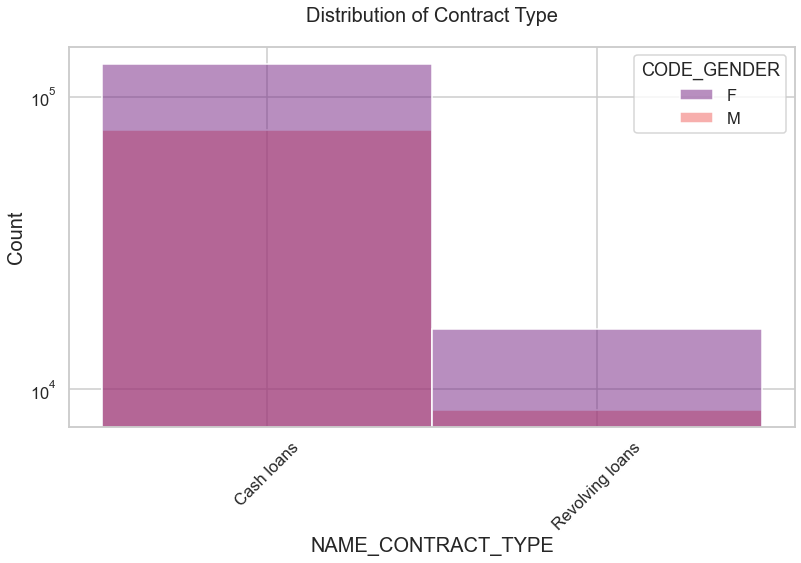

In [51]:
#create plot for Contract type

uniplot(target0_data, col = 'NAME_CONTRACT_TYPE', title='Distribution of Contract Type', hue='CODE_GENDER')

Conclusion from above plot:

1. 'Cash loans' has more credits than 'Revolving loans' contract type.
2. Also, female category is leading here as well.

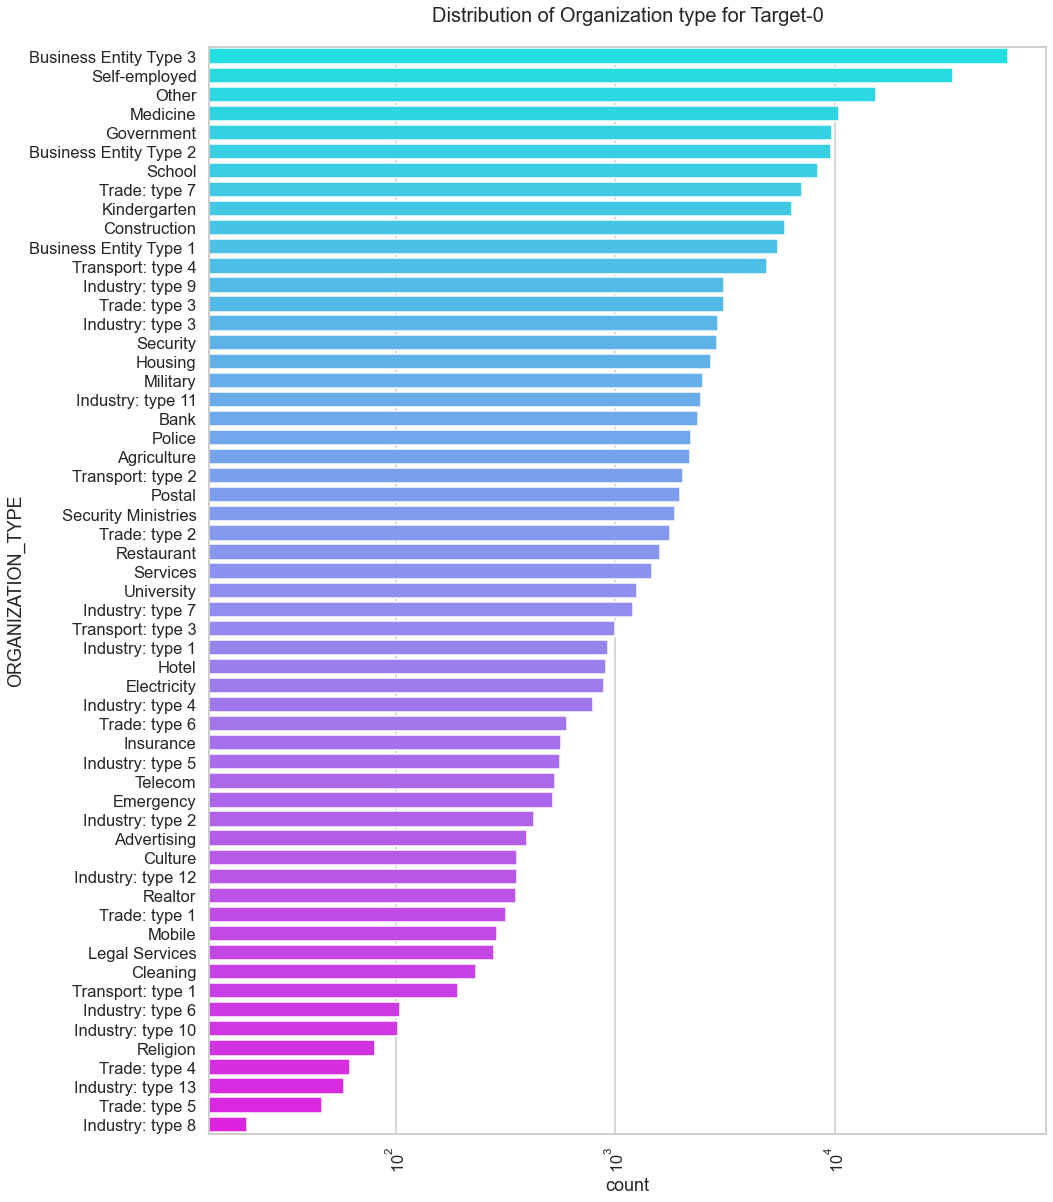

In [52]:
#count plot for Organization type in log scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,20))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 25
plt.rcParams['axes.labelsize'] = 18

plt.title('Distribution of Organization type for Target-0')

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_data, y='ORGANIZATION_TYPE', order=target0_data['ORGANIZATION_TYPE'].value_counts().index , palette='cool')

plt.show()


Conclusion from above plot:

1. Top 5 categories are 'Business entity Type 3' 'Self employed' , 'Other' , Medicine' and 'Government' which have applied for the loan.
2. Categories which have applied very less are Industry type 8, type 13 and Trade type 5, type4 and Religion.

In [53]:
#Let's try to find any correlation for numerical columns for both target0 and target1

target0_correlation = target0_data.iloc[0:,2:]
target1_correlation = target1_data.iloc[0:,2:]

target0 = target0_correlation.corr(method='spearman')
target1 = target1_correlation.corr(method='spearman')

In [54]:
#target0 correlation

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030442,-0.266534,-0.030948,-0.155518,0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110693,0.054666,0.060868,-0.040559,0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.061098,0.169030,0.104251,0.015318,0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064806,0.100287,0.074643,-0.010712,0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030442,0.110693,0.061098,0.064806,1.000000,0.041641,-0.001012,0.042090,0.010246,0.132818,-0.025257,0.032339,0.056671,-0.049782,-0.034845,-0.007363
DAYS_BIRTH,-0.266534,0.054666,0.169030,0.100287,0.041641,1.000000,0.307787,0.265449,0.083331,-0.051299,-0.058627,-0.038104,-0.012789,-0.167477,-0.111539,-0.029007
DAYS_EMPLOYED,-0.030948,0.060868,0.104251,0.074643,-0.001012,0.307787,1.000000,0.126708,0.106823,-0.026444,-0.065435,-0.086966,-0.063533,-0.118224,-0.125954,-0.069567
DAYS_REGISTRATION,-0.155518,-0.040559,0.015318,-0.010712,0.042090,0.265449,0.126708,1.000000,0.036788,0.029553,-0.017715,-0.015092,-0.007716,-0.038064,-0.047339,-0.027231
DAYS_ID_PUBLISH,0.119164,0.036702,0.038197,0.027354,0.010246,0.083331,0.106823,0.036788,1.000000,-0.008538,-0.027302,-0.020823,-0.008525,-0.054875,-0.033427,-0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.132818,-0.051299,-0.026444,0.029553,-0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [55]:
#target1 correlation

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029500,-0.175025,-0.006823,-0.110854,0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058486,0.103026,0.053798,-0.011378,0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043850,0.200718,0.107605,0.021973,0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.029069,0.100200,0.060193,-0.019762,0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029500,0.058486,0.043850,0.029069,1.000000,0.044461,0.015227,0.033342,0.017767,0.108857,-0.032864,-0.008535,0.012313,-0.057390,-0.044871,-0.014720
DAYS_BIRTH,-0.175025,0.103026,0.200718,0.100200,0.044461,1.000000,0.256870,0.192350,0.146246,-0.041994,-0.046320,-0.022208,-0.000356,-0.145884,-0.096181,-0.009633
DAYS_EMPLOYED,-0.006823,0.053798,0.107605,0.060193,0.015227,0.256870,1.000000,0.086286,0.104244,-0.010328,-0.069566,-0.082264,-0.056081,-0.118869,-0.139863,-0.069316
DAYS_REGISTRATION,-0.110854,-0.011378,0.021973,-0.019762,0.033342,0.192350,0.086286,1.000000,0.061563,0.044753,-0.006362,-0.000896,0.001416,-0.015831,-0.039204,-0.026105
DAYS_ID_PUBLISH,0.091042,0.051113,0.065143,0.044128,0.017767,0.146246,0.104244,0.061563,1.000000,-0.012709,-0.024860,-0.013162,-0.002567,-0.048184,-0.015838,0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.108857,-0.041994,-0.010328,0.044753,-0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [56]:
#let's now try to show this correlation through heat map

def correlation_target(data,title):
    plt.figure(figsize=(10,8))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    
    sns.heatmap(data, cmap='RdYlGn')
    
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

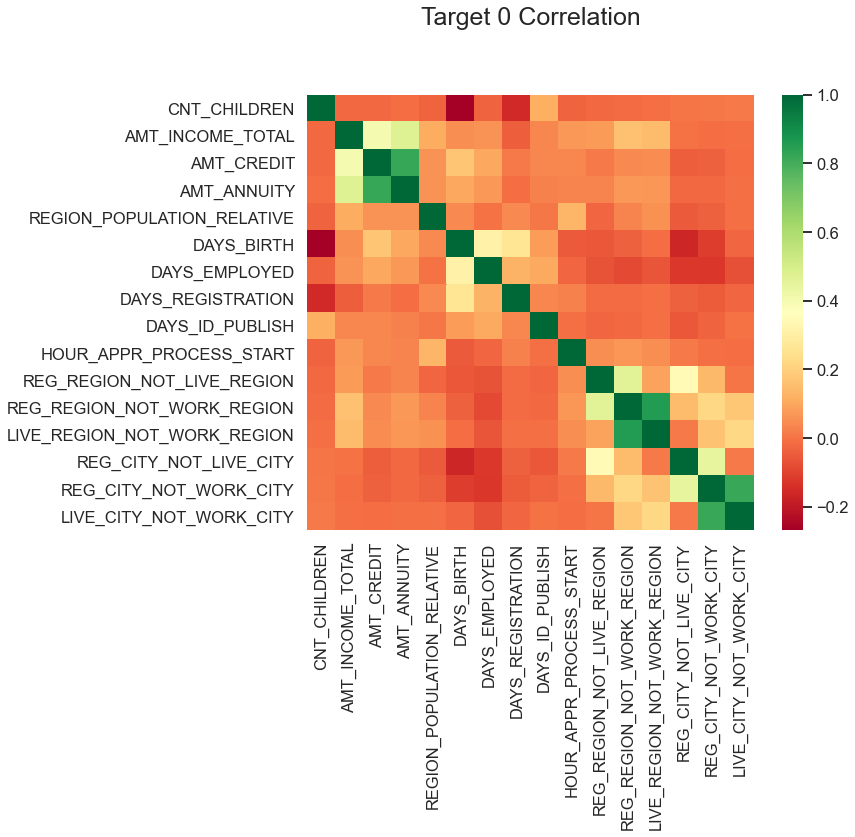

In [57]:
#Heat map for target 0

correlation_target(data=target0, title ='Target 0 Correlation')

Conclusion from above Target0 correlation Heat Map:

1. Credit amount is inversely proportional to the number of children client have, that means Credit amount is higher for less children count client have and vice-versa.
2. Income amount is inversely proportional to the number of children customers have, that means more income for less children customers have and vice-versa.
3. Customers with less children have in densely populated area.
4. Credit amount is higher to densely populated area.
5. The income is also higher in densely populated area.

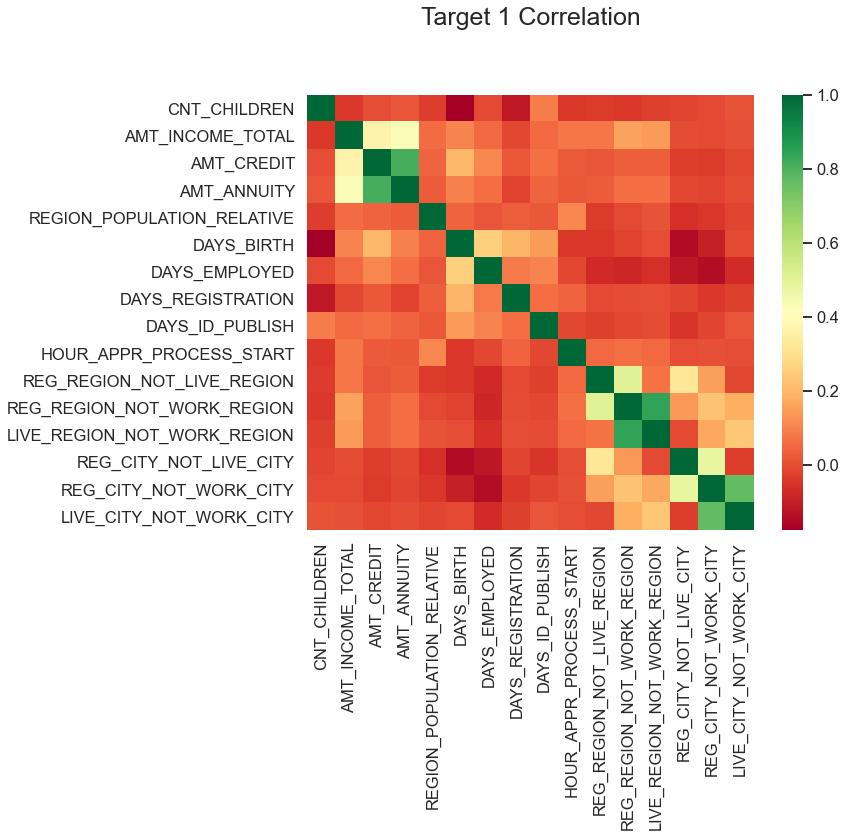

In [58]:
#Heat map for target 0

correlation_target(data=target1, title ='Target 1 Correlation')

Conclusion from above Target1 Heatmap:

1. Customers having less children, their permanent address does not match work address and vice-versa.
2. Customers having less children, their permanent address does not match contact address and vice-versa.

### Univariate Analysis for Varibales ###


In [59]:
#Univariate Varibale with Box Plot in log scale

def univariate_variable(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    plt.rcParams['axes.labelsize'] = 20
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=target1_data, y=col , orient='v')
   
    plt.show()

#### Handling outliers for Target 0 ####

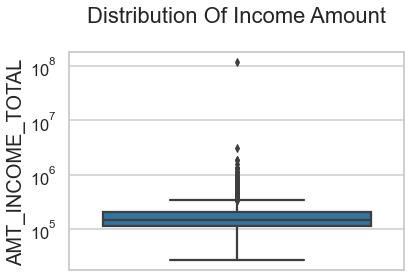

In [60]:
#AMT_INCOME_TOTAL distribution analysis

univariate_variable(data= target0_data, col = 'AMT_INCOME_TOTAL',title = 'Distribution Of Income Amount')


Conclusion from above Box Plot:

1. Third quartile is very narrow and has very less values comapre to other quartiles.
2. There are some outliers as well in income amount.

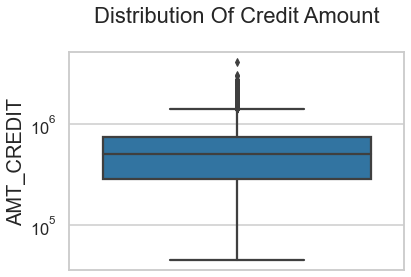

In [61]:
#Distribution of Credit Amount


univariate_variable(data= target0_data, col='AMT_CREDIT', title='Distribution Of Credit Amount')

Conclusion from Credit Amount Box Plot:

1. Credit amount also has some outliers in it.
2. As per the box plot first quartile is bigger than 75th quartile for credit amount which means loan of most of people lie in the first quartile.

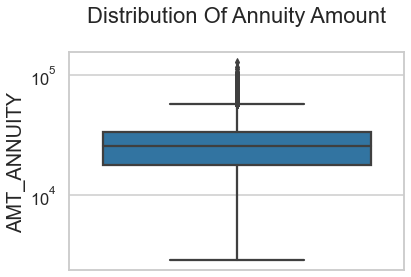

In [62]:
#Distribution of Annuity Amount

univariate_variable(data=target0_data, col = "AMT_ANNUITY" , title="Distribution Of Annuity Amount")

Conclusion from above Box Plot:

1. Annuity amount also has some outliers.
2. First quartile is way bigger than third quartile which means maximum number of clients are from first quartile.

#### Handling outliers for Target 1 ####

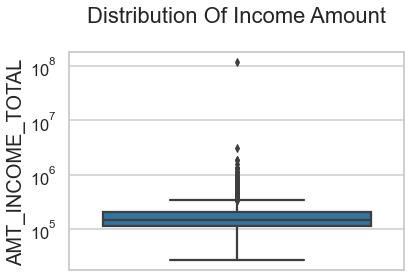

In [63]:
#Distribution of Income Amount

univariate_variable(data=target1_data, col='AMT_INCOME_TOTAL', title='Distribution Of Income Amount')

Conclusion from the above Box Plot:

1. Income amount has some outliers.
2. First quartile is greater than third quartile.
3. Maximum income clients are present in first quartile.

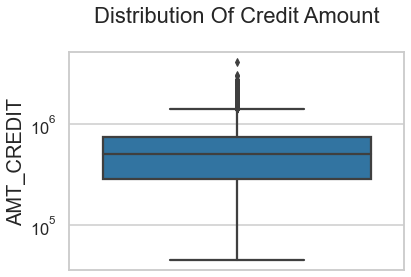

In [64]:
#Distribution Of Credit Amount

univariate_variable(data=target1_data, col='AMT_CREDIT', title='Distribution Of Credit Amount')

Conclusion from above Box Plot:

1. Credit amount has some outliers.
2. First quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

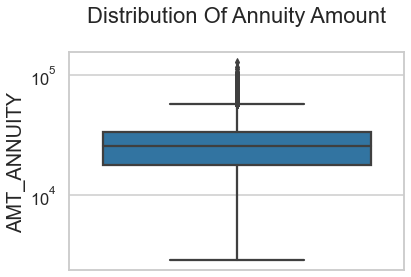

In [65]:
#Distribution of Annuity Amount

univariate_variable(data=target1_data, col='AMT_ANNUITY' , title='Distribution Of Annuity Amount')

Conclusion from above Box Plot:

1. Annuity amount has some outliers.
2. First quartile is bigger than third quartile for annuity amount which means most of the annuity clients are present in first quartile.

### Bivariate Analysis for Numerical Variables ###

#### Analysis for Target 0 ####

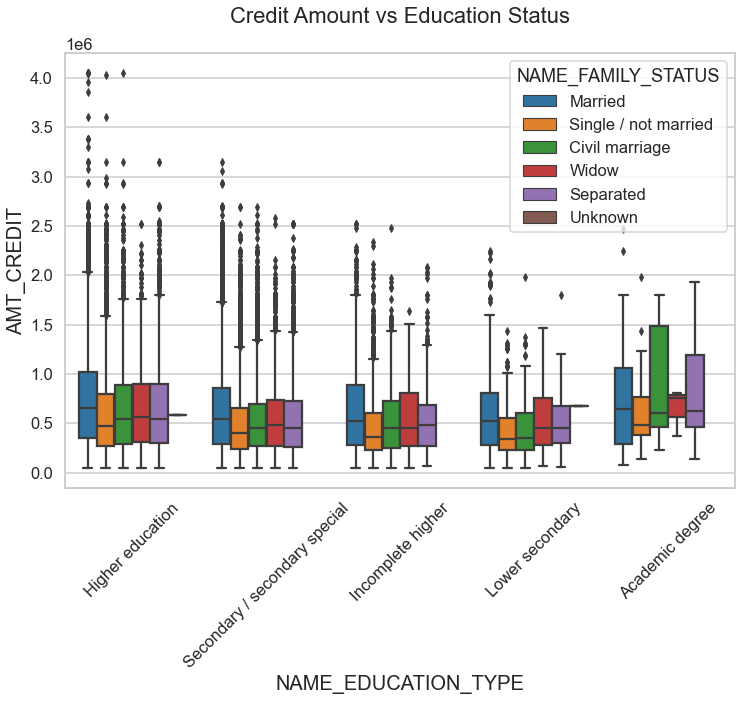

In [66]:
#Box Plot for Credit Amount

plt.figure(figsize=(12,8))
plt.xticks(rotation= 45)
sns.boxplot(data=target0_data , x= 'NAME_EDUCATION_TYPE', y="AMT_CREDIT", hue='NAME_FAMILY_STATUS', orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Conclusion from above Box Plot:

1. Clients with Academic degree and with Family Status of 'Civil marriage' , 'Married', 'Separated' are having higher credits than others.
2. Clients with Higher education and with Family Status of 'Married' ,'Single', 'Civil Marriage' are having more outliers.
3. Civil Marriage for Academic degree is having most of the credits in the third quartile.
4. Widow for Academic degree is having least number of credits in third quartile.

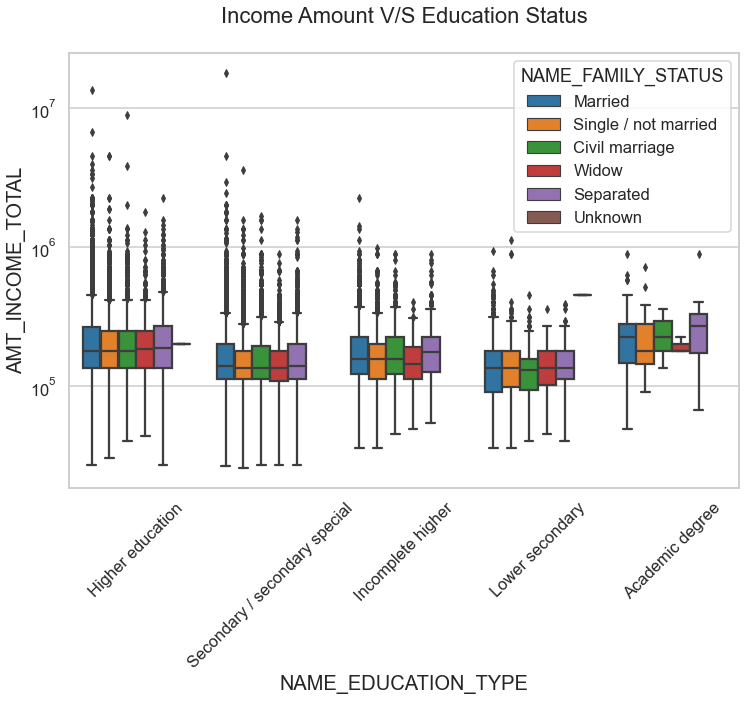

In [67]:
#Box Plot for Income Amount in log scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yscale('log')

sns.boxplot(data=target0_data , x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL' , hue='NAME_FAMILY_STATUS', orient= 'v')
plt.title('Income Amount V/S Education Status')

plt.show()


Conclusion from above Box Plot:

1. Married with Secondary special having maximum outliers among all categories.
2. Academic Degree has minimum outliers.
3. For higher education each Family Status category has equal Income.

#### Analysis for Target 1 ####

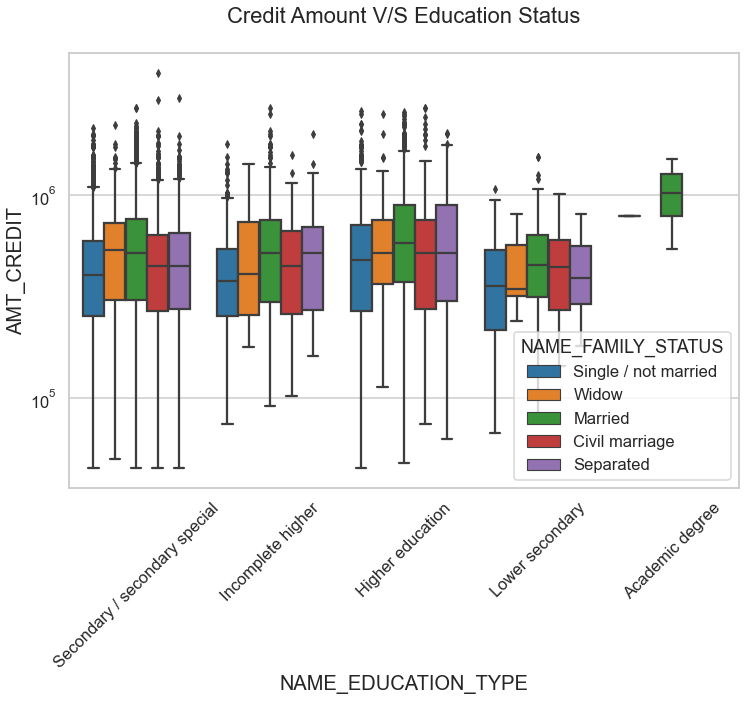

In [68]:
#Box Plot for Credit Amount

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yscale('log')

sns.boxplot(data=target1_data , x='NAME_EDUCATION_TYPE' ,y='AMT_CREDIT' , hue='NAME_FAMILY_STATUS', orient= 'v')
plt.title('Credit Amount V/S Education Status')

plt.show()


Conclusion from above Box Plot:

1. For Academic degree only 'Married' Family Status has some significant and highest credits.
2. Higher Education, Secondary Education , Incomplete Higher are the top 3 categories with outliers.
3. For Higher Education 'Marrie' Family status has maximum credits in first quartile. 

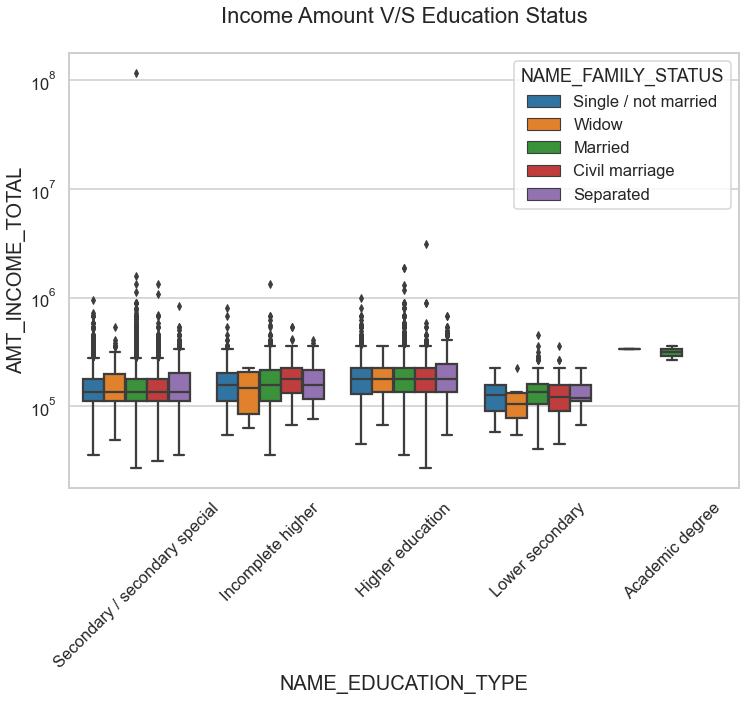

In [69]:
#Box Plot for Income Amount in log scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yscale('log')

sns.boxplot(data=target1_data , x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL' , hue='NAME_FAMILY_STATUS', orient= 'v')
plt.title('Income Amount V/S Education Status')

plt.show()


Conclusion from above Box Plot:

1. Total income also has outliers.
2. Higher educatoin each family status has the equal income.
3. Higher education has the same mean for each family status.
4. Secondary education also has the same mean for each family status.

### Let's go through the previous_application.csv , which  uploaded in the begining of the data uploading ###

In [70]:
#let's view the previous_application.csv  data

prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
prev_app_data.shape

(1670214, 37)

In [72]:
#info of previous_application.csv
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Data cleaning for previous_application.csv ####

In [73]:
#listing the null vlaues above 40%

prev_app_null_val = (prev_app_data.isnull().sum()*100)/len(prev_app_data)
len(prev_app_null_val[prev_app_null_val >=.4])


14

In [74]:
#Removing Null values columns having more than 30% null values

# prev_app_null_val = list(prev_app_null_val[prev_app_null_val.values>=0.3].index)
# prev_app_data.drop(labels= prev_app_null_val, axis=1, inplace = True)

# prev_app_data.shape

In [75]:
#list of the columns having null values greater than 40%

rem = list(prev_app_null_val[prev_app_null_val >.4].index)
rem

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [76]:
#Dropping the columns having null values more than 40%
prev_app_data = prev_app_data.drop(columns= rem)
prev_app_data.shape

(1670214, 23)

In [77]:
#Since there are some columns having values like: 'XNA' and XAP' need to drop them as well

prev_app_data = prev_app_data.drop(prev_app_data[prev_app_data['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_app_data = prev_app_data.drop(prev_app_data[prev_app_data['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
prev_app_data.shape

(69635, 23)

#### Since both the dataframes have cleaned data and column values to share with each other , we can merge them ####

In [78]:
#merge previous_application and application_data

new_data = pd.merge(left=app_data, right=prev_app_data, how='inner', on='SK_ID_CURR', suffixes='+x')

list(new_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE+',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT+',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START+',
 'HOUR_APPR_PROCESS_START+',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPEx',
 'AMT_APPLICATION',
 'AMT_CREDITx',
 'WEEKDAY_APPR_PROCESS_STARTx',
 'HOUR_APPR_PROCESS_STARTx',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',


In [79]:
#Rename the columns after merging botht he dataframes
new_data1 = new_data.rename({'NAME_CONTRACT_TYPE+' : 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT+' :'AMT_CREDIT',
 'WEEKDAY_APPR_PROCESS_START+' :'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START+' : 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPEx' : 'NAME_CONTRACT_TYPE_PREV',
 'AMT_CREDITx' : 'AMT_CREDIT_PREV',
 'WEEKDAY_APPR_PROCESS_STARTx' : 'WEEKDAY_APPR_PROCESS_START_PREV',
 'HOUR_APPR_PROCESS_STARTx' : 'HOUR_APPR_PROCESS_START_PREV'
 }, axis=1)


In [80]:
list(new_data1.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPE_PREV',
 'AMT_APPLICATION',
 'AMT_CREDIT_PREV',
 'WEEKDAY_APPR_PROCESS_START_PREV',
 'HOUR_APPR_PROCESS_START_PREV',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJE

In [81]:
#remove all the columns which are not required

new_data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START',
                'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
                'HOUR_APPR_PROCESS_START_PREV','FLAG_LAST_APPL_PER_CONTRACT',
                'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

#### Perform Univariate Analysis on Newly created Dataframe new_data1 ####

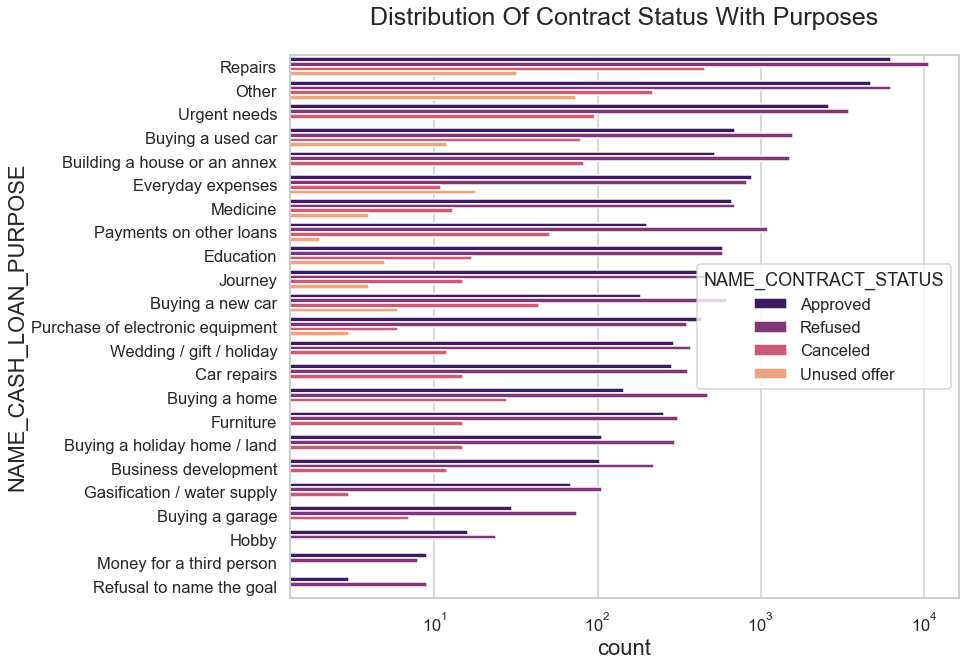

In [82]:
#distribution of Contract status in log scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(12,10))

plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.labelsize'] = 22

plt.xscale('log')
plt.title('Distribution Of Contract Status With Purposes')

ax = sns.countplot(data=new_data1, y='NAME_CASH_LOAN_PURPOSE', order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                  hue= 'NAME_CONTRACT_STATUS', palette='magma')

Conclusion from Above Count Plot:

1. 'Payments on other loans' has most refused rate and 'Buying a new car' also has most refused rate than approved.
2. 'Education' purposes has the same approved and refused rate.

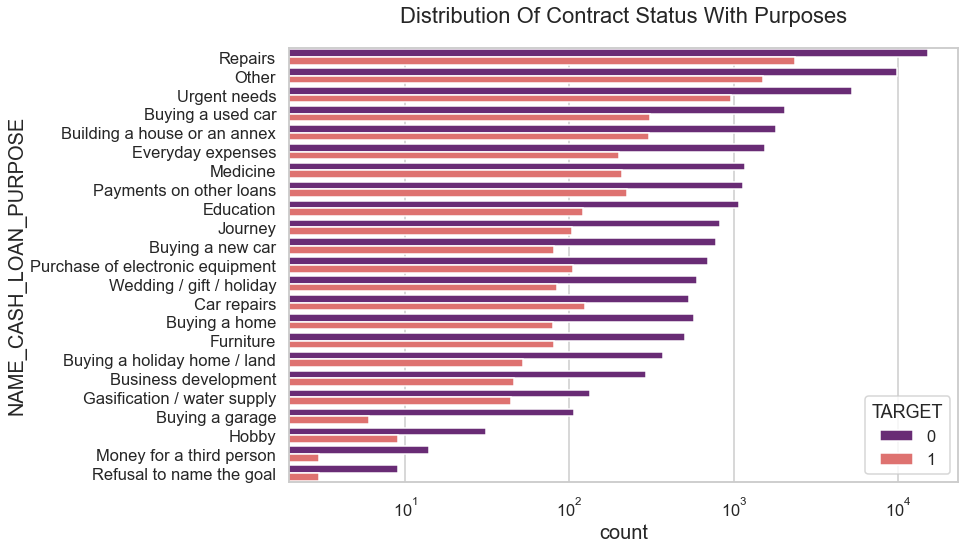

In [83]:
#distribution of Target in log scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(12,8))

plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 25
plt.rcParams['axes.labelsize'] = 20

plt.xscale('log')
plt.title('Distribution Of Contract Status With Purposes')

ax = sns.countplot(data=new_data1, y='NAME_CASH_LOAN_PURPOSE', order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                  hue= 'TARGET', palette='magma')

Conclusion from above countplot:

1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.
2. 'Buying a garage', 'Business Development', 'Buying Land', ''Buying a new car', 'Education', are the loan purposes which are having minimal difficulties in payment.

#### Performing bivariate analysis ####

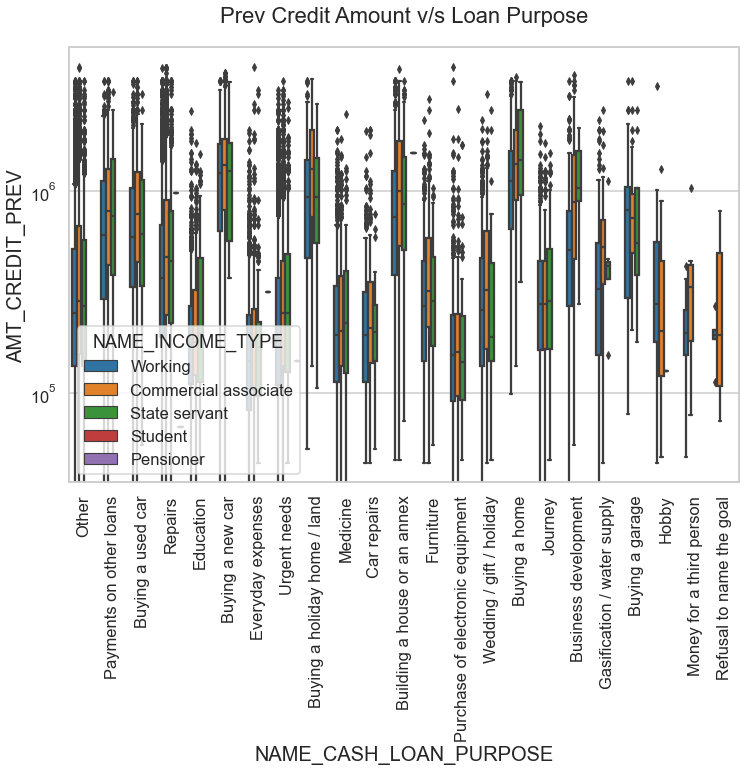

In [84]:
# Box plot for Credit Amount on log scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data=new_data1, x='NAME_CASH_LOAN_PURPOSE', hue="NAME_INCOME_TYPE",
           y='AMT_CREDIT_PREV', orient='v')

plt.title('Prev Credit Amount v/s Loan Purpose')

plt.show()

Conclusion from above Box Plot:

1. 'Servent' income type category seems to have applied in significant amount.
2. 'Money for a third person' has less credit applied for.
3. 'Buying a land', 'Buying a home', 'Building a home', 'Buying a car', have higher credit amount loan.

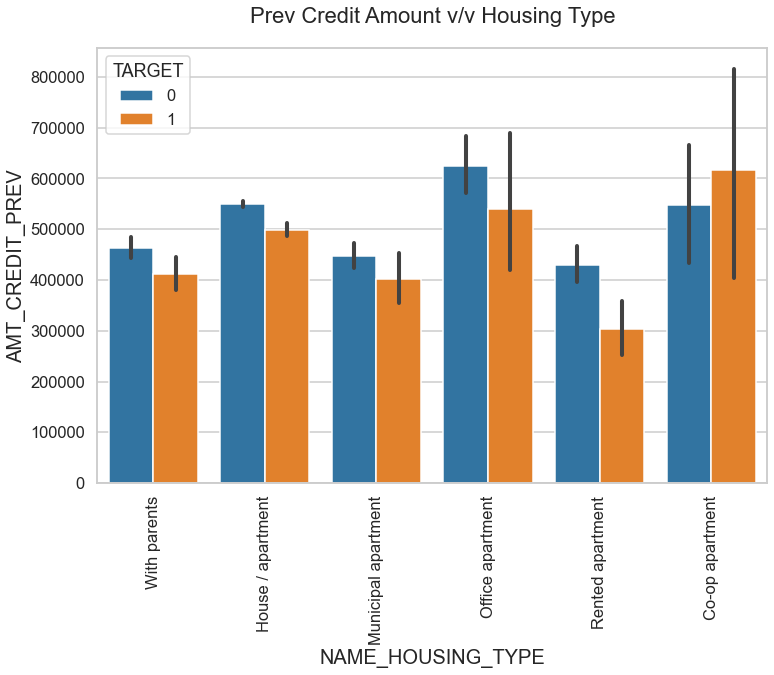

In [85]:
#Box plot for Credit amount prev v/s Housing type on log scale

plt.figure(figsize=(12,8))
plt.xticks(rotation=90)

sns.barplot(data=new_data1, y='AMT_CREDIT_PREV', hue='TARGET', x='NAME_HOUSING_TYPE')

plt.title('Prev Credit Amount v/v Housing Type')
plt.show()

Conclusion from above Barplot:

1. 'Co-op apartment' shows difficulties in repay the loan amount as the bar of Target 1 is high, so bank needs to be careful about this category.
2. 'Office aprtment' shows good loan repayment response as bar of Target0 is high , so bank should focus more on this category.

## FINAL CONCLUSION: ##

#### 1. Loan purpose 'Repair' has higher number of unsuccessful payments on time. ####
#### 2. Bank should focus more on "student', 'Pensioner', 'Businessman' with housing type other than 'Co-op apartment for successful payments. ####
#### 3. Bank needs to be extra careful on income type 'Working' as they are having most number of unsuccessful payments. ####
#### 4. Customer from housing type 'With Parents' since they are having minimum number of unsuccessful payments. ####